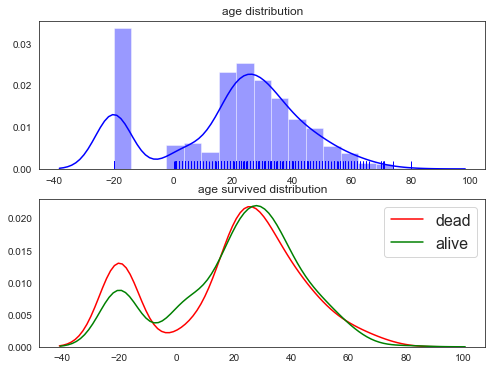

In [37]:
import os
#數據處理
import pandas as pd
import numpy as np
import random
import sklearn.preprocessing as preprocessing
#可視化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#機器學習
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from scipy import stats
#數據讀入
train = pd.read_csv('/Users/bella/titanic/train.csv')
test = pd.read_csv('/Users/bella/titanic/test.csv')

#觀察年齡，缺失資料以-20填補
fig, axes = plt.subplots(2,1,figsize=(8,6))
sns.set_style('white')
sns.distplot(train.Age.fillna(-20), rug=True, color='b', ax=axes[0])

ax0 =axes[0]
ax0.set_title('age distribution')
ax0.set_xlabel('')
#觀察年齡與存活之關係
ax1 = axes[1]
ax1.set_title('age survived distribution')
k1 = sns.distplot(train[train.Survived == 0].Age.fillna(-20), hist=False, color='r', ax=ax1, label='dead')
k2 = sns.distplot(train[train.Survived == 1].Age.fillna(-20), hist=False, color='g', ax=ax1, label='alive')
ax1.set_xlabel('')

ax1.legend(fontsize=16)

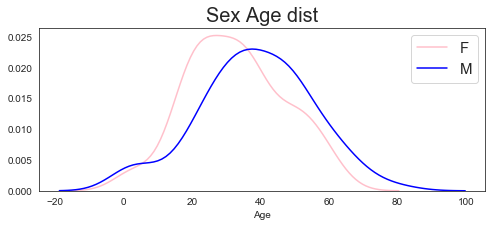

In [35]:
#男女比例分佈
f, ax = plt.subplots(figsize=(8,3))
ax.set_title('Sex Age dist', size=20)
sns.distplot(train[train.Sex =='female'].dropna().Age, hist=False, color='pink', label='F')
sns.distplot(train[train.Sex == 'male'].dropna().Age, hist=False, color='blue', label='M')
ax.legend(fontsize=15)

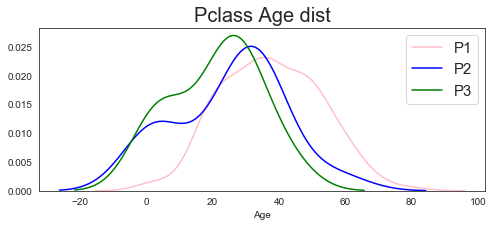

In [34]:
#艙等與年齡關係
f ,ax = plt.subplots(figsize=(8,3))
ax.set_title('Pclass Age dist', size=20)
sns.distplot(train[train.Pclass ==1].dropna().Age, hist=False, color='pink', label='P1')
sns.distplot(train[train.Pclass ==2].dropna().Age, hist=False, color='blue', label='P2')
sns.distplot(train[train.Pclass ==3].dropna().Age, hist=False, color='g',label='P3')
ax.legend(fontsize=15)

Text(0.5, 1.0, 'Pclass Surveved count')

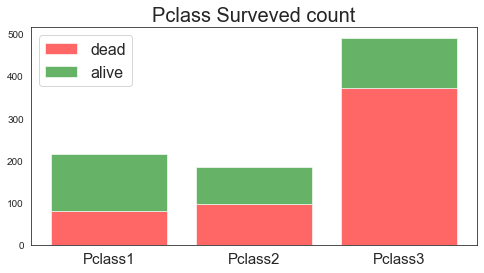

In [32]:
#艙等與存活率關係
y_dead = train[train.Survived==0].groupby('Pclass')['Survived'].count().values
y_alive = train[train.Survived==1].groupby('Pclass')['Survived'].count().values
pos= [1, 2, 3]
ax = plt.figure(figsize=(8,4)).add_subplot(111)
ax.bar(pos, y_dead, color='red', alpha=0.6, label='dead')
ax.bar(pos, y_alive, bottom=y_dead, color='green', alpha=0.6, label='alive')
ax.legend(fontsize=16, loc='best')

ax.set_xticks(pos)
ax.set_xticklabels(['Pclass%d'%(i) for i in range(1,4)], size=15)
ax.set_title('Pclass Surveved count', size = 20)

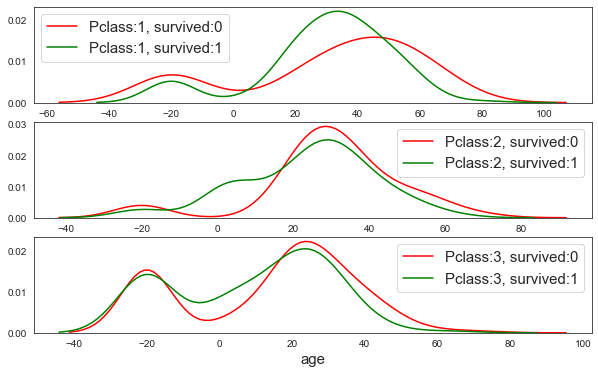

In [23]:
#針對個別艙等分析存活者年齡
pos = range(0,6)
age_list = []
for Pclass_ in range(1,4):
    for Survived_ in range(0,2):
        age_list.append(train[(train.Pclass == Pclass_)&(train.Survived == Survived_)].Age.fillna(-20).values)
fig, axes = plt.subplots(3,1,figsize=(10,6))
i_Pclass = 1
for ax in axes:
    sns.distplot(age_list[i_Pclass*2-2], hist=False, ax=ax, label='Pclass:%d, survived:0'%(i_Pclass), color='r')
    sns.distplot(age_list[i_Pclass*2-1], hist=False, ax=ax, label='Pclass:%d, survived:1'%(i_Pclass), color='g')
    i_Pclass += 1
    ax.set_xlabel('age', size=15)

    ax.legend(fontsize=15)


In [24]:
#男女數量
print(train.Sex.value_counts())
print('===============================')
#男女生存機率
print(train.groupby('Sex')['Survived'].mean())

male      577
female    314
Name: Sex, dtype: int64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


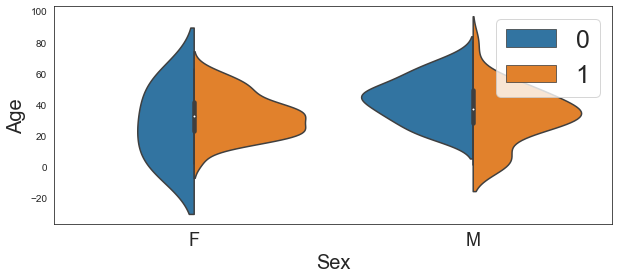

In [36]:
#存活者之男女年齡分佈
ax = plt.figure(figsize=(10, 4)).add_subplot(111)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train.dropna(), split=True)
ax.set_xlabel('Sex', size=20)
ax.set_xticklabels(['F','M'], size=18)
ax.set_ylabel('Age',size=20)
ax.legend(fontsize=25,loc='best')

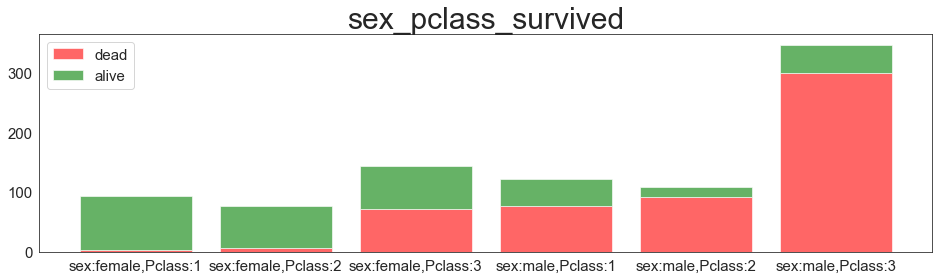

In [28]:
#根據艙等，不同性別之存活率
label = []
for sex_i in ['female','male']:
    for pclass_i in range(1,4):
        label.append('sex:%s,Pclass:%d'%(sex_i, pclass_i))
pos = range(6)
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.bar(pos,
      train[train['Survived'] == 0].groupby(['Sex','Pclass'])['Survived'].count().values,
      color='r',
      alpha=0.6,
      align='center',
      tick_label=label,
      label='dead')
ax.bar(pos,
      train[train['Survived'] == 1].groupby(['Sex','Pclass'])['Survived'].count().values,
      bottom=train[train['Survived']==0].groupby(['Sex','Pclass'])['Survived'].count().values,
      color='g',
      alpha=0.6,
      align='center',
      tick_label=label,
      label='alive')
ax.tick_params(labelsize=15)
ax.set_title('sex_pclass_survived' , size=30)
ax.legend(fontsize=15, loc='best')

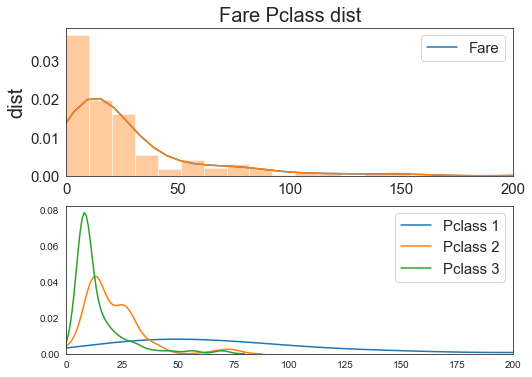

In [43]:
#艙等與票價
fig =plt.figure(figsize=(8, 6))
ax = plt.subplot2grid((2,2), (0,0), colspan=2)

ax.tick_params(labelsize=15)
ax.set_title('Fare dist', size=20)
ax.set_ylabel('dist', size=20)
sns.kdeplot(train.Fare, ax=ax)
sns.distplot(train.Fare, ax=ax)
ax.legend(fontsize=15)

pos=range(0,400,50)
ax.set_xticks(pos)
ax.set_xlim([0,200])
ax.set_xlabel('')

ax1 = plt.subplot2grid((2,2), (1,0), colspan=2)
ax.set_title('Fare Pclass dist', size=20)
for i in range(1,4):
    sns.kdeplot(train[train.Pclass==i].Fare, ax=ax1, label='Pclass %d'%(i))
ax1.set_xlim([0, 200])
ax1.legend(fontsize=15)

Text(0.5, 0, 'Fare')

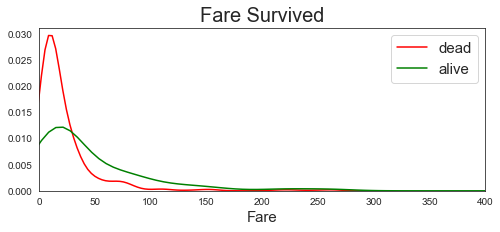

In [46]:
#票價與生存率
fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(111)
sns.kdeplot(train[train.Survived == 0].Fare, ax=ax1, label='dead', color='r')
sns.kdeplot(train[train.Survived == 1].Fare, ax=ax1, label='alive', color='g')

ax1.set_xlim([0, 400])
ax1.legend(fontsize=15)
ax1.set_title('Fare Survived', size = 20)
ax1.set_xlabel('Fare', fontsize=15)

Text(0.5, 1.0, 'Parch')

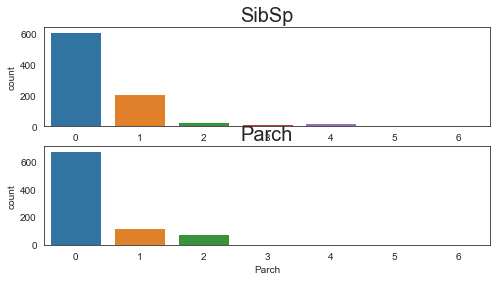

In [52]:

fig = plt.figure(figsize=(8,4))
#有旁親關係人數
ax1 = fig.add_subplot(211)
sns.countplot(train.SibSp)
ax1.set_title('SibSp', size=20)
#有直系親屬關係人數
ax2 = fig.add_subplot(212, sharex=ax1)
sns.countplot(train.Parch)
ax2.set_title('Parch', size = 20)


Text(0.5, 1.0, 'Parch+Sibsp Survived Rate')

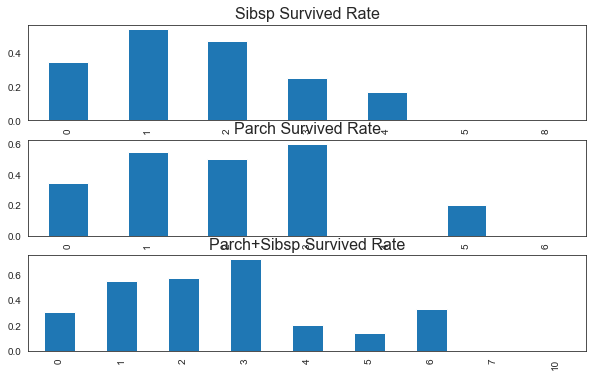

In [55]:
#有旁親同行的人，存活率
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(311)
train.groupby('SibSp')['Survived'].mean().plot(kind='bar', ax =ax1)
ax1.set_title('Sibsp Survived Rate', size=16)
ax1.set_xlabel('')
#有直親同行的人，存活率
ax2 = fig.add_subplot(312)
train.groupby('Parch')['Survived'].mean().plot(kind='bar', ax =ax2)
ax2.set_title('Parch Survived Rate', size=16)
ax2.set_xlabel('')
#有任何親屬同行的人，存活率
ax3 = fig.add_subplot(313)
train.groupby(train.SibSp+train.Parch)['Survived'].mean().plot(kind='bar', ax=ax3)
ax3.set_title('Parch+Sibsp Survived Rate', size=16)

Text(0.5, 1.0, 'Embarked Survived Count')

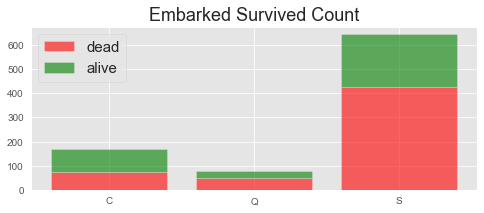

In [59]:
#逃生出口存活與死亡數
plt.style.use('ggplot')
ax = plt.figure(figsize=(8,3)).add_subplot(111)
pos = [1 ,2 ,3 ]
y1 = train[train.Survived==0].groupby('Embarked')['Survived'].count().sort_index().values
y2 = train[train.Survived==1].groupby('Embarked')['Survived'].count().sort_index().values
ax.bar(pos, y1, color='r', alpha=0.6, align='center', label='dead')
ax.bar(pos, y2, color='g', alpha=0.6, align='center', label='alive', bottom=y1)

ax.set_xticks(pos)
ax.set_xticklabels(['C','Q','S'])
ax.legend(fontsize=15, loc='best')
ax.set_title('Embarked Survived Count', size=18)

Text(0.5, 1.0, 'Embarked Age Dist')

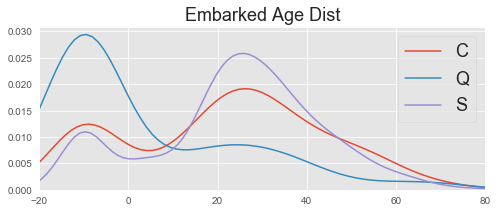

In [60]:
#逃生出口與年齡，Null以-10填補
ax = plt.figure(figsize=(8,3)).add_subplot(111)
ax.set_xlim([-20, 80])
sns.kdeplot(train[train.Embarked=='C'].Age.fillna(-10), ax=ax, label='C')
sns.kdeplot(train[train.Embarked=='Q'].Age.fillna(-10), ax=ax, label='Q')
sns.kdeplot(train[train.Embarked=='S'].Age.fillna(-10), ax=ax, label='S')
ax.legend(fontsize=18)
ax.set_title('Embarked Age Dist', size=18)

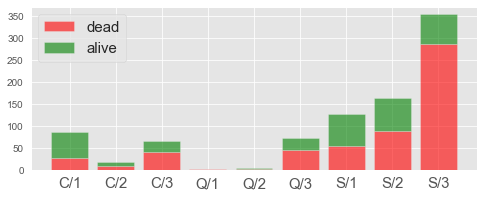

In [63]:
#不同艙等與逃生出口，存活人數
y1 = train[train.Survived==0].groupby(['Embarked', 'Pclass'])['Survived'].count().reset_index()['Survived'].values
y2 = train[train.Survived==1].groupby(['Embarked', 'Pclass'])['Survived'].count().reset_index()['Survived'].values

ax=plt.figure(figsize=(8,3)).add_subplot(111)
pos= range(9)
ax.bar(pos, y1, align='center', alpha=0.6, color='r', label='dead')
ax.bar(pos, y2, align='center', alpha=0.6, bottom=y1, color='g', label='alive')

ax.set_xticks(pos)
xticklabels = []
for embarked_val in ['C', 'Q', 'S']:
    for pclass_val in range(1,4):
        xticklabels.append('%s/%d'%(embarked_val, pclass_val))
        
ax.set_xticklabels(xticklabels, size=15)
ax.legend(fontsize=15, loc='best')

In [64]:
train.Cabin.isnull().value_counts()#座位資料為空數量

True     687
False    204
Name: Cabin, dtype: int64

In [65]:
train.groupby(by=train.Cabin.isnull())['Survived'].mean()#有無座位資料之存活率

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [66]:
train[train.Cabin.apply(lambda x :len(x) if(x is not np.nan) else 0) > 4 ].head() #有親屬者位置為多個

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


In [67]:
train['Cabin_Zone'] = train.Cabin.fillna('0').str.split(' ').apply(lambda x : x[0][0]) #將無座位資料者用0填補
train.groupby(by='Cabin_Zone')['Survived'].agg(['mean', 'count'])#座位資料與存活率，數量

,mean,count
Cabin_Zone,,
0,0.299854,687
A,0.466667,15
B,0.744681,47
C,0.593220,59
D,0.757576,33
E,0.750000,32
F,0.615385,13
G,0.500000,4
T,0.000000,1


In [68]:
train.Ticket.head() #看一下船票的資料

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [69]:
train.Ticket.nunique() #是否有重複的船票

681

In [70]:
train[train.Ticket=='110152']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Zone
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,S,B
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,B79,S,B
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,B


In [74]:
train[train.Cabin=='B77']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Zone
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,S,B
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,B


In [77]:
def find_e_word(x): #船票上有英文字母的，存活機率較大？
    import re
    pattern = re.compile('[a-z]|[A-Z]')
    try:
        re.search(pattern, x).group()
        return 1
    except:
        return 0
    
train['Ticket_e'] = train.Ticket.apply(lambda x: find_e_word(x))
train.groupby('Ticket_e')['Survived'].mean()

Ticket_e
0    0.384266
1    0.382609
Name: Survived, dtype: float64

In [79]:
train.Name.apply(lambda x: x.split(',')[1].split('.')[0]).value_counts()[:5]
#將名字的頭銜調出來，名字去掉 

 Mr        517
 Miss      182
 Mrs       125
 Master     40
 Dr          7
Name: Name, dtype: int64

In [80]:
train.Name.apply(lambda x:x.split(',')[1].split('.')[1]).value_counts()[:8]

 John             9
 James            7
 Mary             6
 William          6
 William John     4
 Bertha           4
 William Henry    4
 Ivan             4
Name: Name, dtype: int64

In [83]:
#特徵工程
print('==================TrainData===============')
print(train.isnull().sum())
print('==================TestData================')
print(test.isnull().sum())

==================TrainData===============
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_Zone       0
Ticket_e         0
dtype: int64
==================TestData================
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [85]:
train[train.Embarked.isnull()]#逃生出口缺資料的

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Zone,Ticket_e
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B,0


In [87]:
print(train.Embarked.value_counts())#從各個逃生出口出去的人數
print('============================')
print(train[(train.Pclass==1)].Embarked.value_counts())#P1艙從各個逃生出口出去的人數

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    127
C     85
Q      2
Name: Embarked, dtype: int64


In [88]:
train.Embarked.fillna('S',inplace=True)#從上述來看，兩位缺失資料的乘客都在P1艙，所以極有可能從S口逃出

In [89]:
#座位資料若為空補0
train['Cabin'] = train['Cabin'].isnull().apply(lambda x : 'Null' if x is True else 'No Null')
test['Cabin'] = train['Cabin'].isnull().apply(lambda x : 'Null' if x is True else 'No Null')
#刪掉兩個應該沒有相關的資料
del train['Name'], test['Name']
del train['Ticket'], test['Ticket']

In [90]:
#年齡離散化處理，缺少值為Null
def age_map(x):
    if x<10:
        return '10-' #10歲以下
    if x<60:
        return '%d-%d'%(x//5*5, x//5*5+5)
    elif x>=60:
        return '60+' #60歲以上
    else:
        return 'Null'
    
train['Age_map'] = train['Age'].apply(lambda x: age_map(x))
test['Age_map'] = test['Age'].apply(lambda x: age_map(x))

train.groupby('Age_map')['Survived'].agg(['count', 'mean'])

,count,mean
Age_map,,
10-,62,0.612903
10-15,16,0.437500
15-20,86,0.395349
20-25,114,0.342105
25-30,106,0.358491
30-35,95,0.421053
35-40,72,0.458333
40-45,48,0.375000
45-50,41,0.390244


In [91]:
test[test.Fare.isnull()] #test資料是不是有缺票價的

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_map
152,1044,3,male,60.5,0,0,NaN,No Null,S,60+


In [93]:
test.loc[test.Fare.isnull(),'Fare'] = \ #缺了一個，補上相同條件的平均值
test[(test.Pclass==3)&(test.Embarked=='S')&(test.Sex=='male')].dropna().Fare.mean()

In [94]:
test[test.Fare.isnull()] #再檢查一下

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_map


In [99]:
#票價分佈太廣，使用scaling加速收斂
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
#Fare
fare_scale_param = scaler.fit(train['Fare'].values.reshape(-1, 1))
train.Fare = fare_scale_param.transform(train['Fare'].values.reshape(-1, 1))
test.Fare = fare_scale_param.transform(test['Fare'].values.reshape(-1, 1))


In [102]:
#one hot label
train_x = pd.concat([train[['SibSp', 'Parch', 'Fare']], 
                     pd.get_dummies(train[['Pclass', 'Sex', 'Cabin', 'Embarked', 'Age_map']])], axis=1)
train_y = train.Survived
test_x = pd.concat([test[['SibSp', 'Parch', 'Fare']],
                    pd.get_dummies(test[['Pclass', 'Sex', 'Cabin', 'Embarked', 'Age_map']])], axis=1)
train_x.head()#看看資料乾淨沒

,SibSp,Parch,Fare,Pclass,Sex_female,Sex_male,Cabin_No Null,Cabin_Null,Embarked_C,Embarked_Q,...,Age_map_20-25,Age_map_25-30,Age_map_30-35,Age_map_35-40,Age_map_40-45,Age_map_45-50,Age_map_50-55,Age_map_55-60,Age_map_60+,Age_map_Null
0,1,0,-0.502445,3,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0.786845,1,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,-0.488854,3,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0.420730,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,-0.486337,3,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [109]:
#採用邏輯回歸
base_line_model = LogisticRegression(solver='liblinear')
param = {'penalty':['l1', 'l2'],
        'C':[0.1, 0.5, 1.0, 5.0]}
grd = GridSearchCV(estimator=base_line_model, param_grid=param, cv=5, n_jobs=3)
grd.fit(train_x, train_y)
grd.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

(0.7994487816366191, 0.029496353096645223)

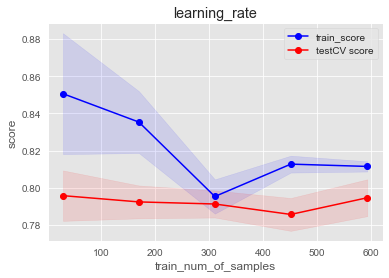

In [127]:
#查看是否過度學習或學習不足
def plot_learning_curve(clf, title, x, y, ylim=None, cv=None, n_jobs=3, train_sizes=np.linspace(.05, 1., 5)):
    import warnings

    warnings.filterwarnings("ignore")
    train_sizes, train_scores, test_scores = learning_curve(clf, x, y, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax = plt.figure().add_subplot(111)
    ax.set_title(title)
    if ylim is not None:
        ax.ylim(*ylim)
    ax.set_xlabel(u"train_num_of_samples")
    ax.set_ylabel(u"score")
    
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                   alpha=0.1, color='blue')
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                   alpha=0.1, color='red')
    ax.plot(train_sizes, train_scores_mean, 'o-', color='blue', label=u"train_score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color='red', label=u"testCV score")
    
    ax.legend(loc='best')
    
    midpoint =((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff


plot_learning_curve(grd, u"learning_rate", train_x, train_y)